In [1]:
import os
import geopandas as gpd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/home/twenty/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import shapely as sp

In [3]:
stops = pd.read_csv('data/hk/headway/stops.txt')

In [4]:
trips = pd.read_csv('data/hk/headway/trips.txt')

In [5]:
routes = pd.read_csv('data/hk/headway/routes.txt')

In [6]:
stop_times = pd.read_csv('data/hk/headway/stop_times.txt')

# Process bus stop data

In [7]:
# exclude ferry, peak tram, and hki trams
conds = (routes.agency_id != 'FERRY') & (routes.agency_id != 'PTRAM') & (routes.agency_id != 'TRAM') & (routes.agency_id != 'GMB')
bus_routes = routes[conds]
bus_routes.agency_id.unique()

array(['KMB', 'KMB+CTB', 'KMB+NWFB', 'LWB', 'LWB+CTB', 'NWFB', 'CTB',
       'NLB', 'LRTFeeder', 'XB', 'DB', 'PI'], dtype=object)

In [8]:
bus_trips = bus_routes.merge(trips, on='route_id', how='inner')
bus_trips.head()

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,service_id,trip_id
0,1001,KMB,1,CHUK YUEN ESTATE - STAR FERRY,3,https://search.kmb.hk/KMBWebSite/?action=route...,287,1001-1-287-0535
1,1001,KMB,1,CHUK YUEN ESTATE - STAR FERRY,3,https://search.kmb.hk/KMBWebSite/?action=route...,287,1001-1-287-0623
2,1001,KMB,1,CHUK YUEN ESTATE - STAR FERRY,3,https://search.kmb.hk/KMBWebSite/?action=route...,287,1001-1-287-0647
3,1001,KMB,1,CHUK YUEN ESTATE - STAR FERRY,3,https://search.kmb.hk/KMBWebSite/?action=route...,287,1001-1-287-0757
4,1001,KMB,1,CHUK YUEN ESTATE - STAR FERRY,3,https://search.kmb.hk/KMBWebSite/?action=route...,287,1001-1-287-0829


In [9]:
bus_stop_times = stop_times[stop_times.trip_id.isin(bus_trips.trip_id)]
bus_stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,timepoint
0,1001-1-287-0535,05:35:00,05:35:00,4001,1,0,1,1
1,1001-1-287-0535,NaN,NaN,4002,2,0,0,0
2,1001-1-287-0535,NaN,NaN,4003,3,0,0,0
3,1001-1-287-0535,NaN,NaN,4004,4,0,0,0
4,1001-1-287-0535,NaN,NaN,4005,5,0,0,0
...,...,...,...,...,...,...,...,...
552705,1000211-1-287-0730,NaN,NaN,1371,16,0,0,0
552706,1000211-1-287-0730,NaN,NaN,1148,17,0,0,0
552707,1000211-1-287-0730,NaN,NaN,8340,18,0,0,0
552708,1000211-1-287-0730,NaN,NaN,10265,19,0,0,0


In [10]:
bus_stops = bus_stop_times[['trip_id', 'stop_id']].merge(stops, on='stop_id')
bus_stops

,trip_id,stop_id,stop_name,stop_lat,stop_lon,zone_id,location_type,stop_timezone
0,1001-1-287-0535,4001,[CTB] CHUK YUEN ESTATE|[KMB+CTB] CHUK YUEN EST...,22.34535,114.19244,4001,0,Asia/Hong_Kong
1,1001-1-287-0623,4001,[CTB] CHUK YUEN ESTATE|[KMB+CTB] CHUK YUEN EST...,22.34535,114.19244,4001,0,Asia/Hong_Kong
2,1001-1-287-0647,4001,[CTB] CHUK YUEN ESTATE|[KMB+CTB] CHUK YUEN EST...,22.34535,114.19244,4001,0,Asia/Hong_Kong
3,1001-1-287-0757,4001,[CTB] CHUK YUEN ESTATE|[KMB+CTB] CHUK YUEN EST...,22.34535,114.19244,4001,0,Asia/Hong_Kong
4,1001-1-287-0829,4001,[CTB] CHUK YUEN ESTATE|[KMB+CTB] CHUK YUEN EST...,22.34535,114.19244,4001,0,Asia/Hong_Kong
...,...,...,...,...,...,...,...,...
552705,1000199-1-480-0800,10000093,"[CTB] QUEEN'S HILL ESTATE, LUNG MA ROAD",22.50348,114.15595,10000093,0,Asia/Hong_Kong
552706,1000198-1-287-0715,10000096,[CTB] KAI TAK,22.33276,114.19908,10000096,0,Asia/Hong_Kong
552707,1000198-1-287-0800,10000096,[CTB] KAI TAK,22.33276,114.19908,10000096,0,Asia/Hong_Kong
552708,1000198-2-287-1715,10000096,[CTB] KAI TAK,22.33276,114.19908,10000096,0,Asia/Hong_Kong


In [11]:
bus_stops = bus_stops.drop_duplicates('stop_id')

In [12]:
bus_stops

,trip_id,stop_id,stop_name,stop_lat,stop_lon,zone_id,location_type,stop_timezone
0,1001-1-287-0535,4001,[CTB] CHUK YUEN ESTATE|[KMB+CTB] CHUK YUEN EST...,22.34535,114.19244,4001,0,Asia/Hong_Kong
225,1001-1-287-0535,4002,"[CTB] BAPTIST RAINBOW PRIMARY SCHOOL, CHUK YUE...",22.34506,114.19000,4002,0,Asia/Hong_Kong
354,1001-1-287-0535,4003,[KMB+CTB] MA CHAI HANG RECREATION GROUND/<BR>M...,22.34422,114.18777,4003,0,Asia/Hong_Kong
479,1001-1-287-0535,4004,"[KMB+NWFB] MORSE PARK/<BR>MORSE PARK, FUNG MO ...",22.33971,114.18938,4004,0,Asia/Hong_Kong
605,1001-1-287-0535,4005,[KMB+NWFB] MORSE PARK SPORTS CENTRE/<BR>MORSE ...,22.33780,114.18990,4005,0,Asia/Hong_Kong
...,...,...,...,...,...,...,...,...
552653,1000193-1-287-0015,10000088,[DB] DISCOVERY BAY ROAD NEAR CAPEVALE DRIVE,22.29412,114.02284,10000088,0,Asia/Hong_Kong
552668,1000193-2-287-0050,10000089,[DB] DISCOVERY BAY ROAD NEAR CAPEVALE DRIVE,22.29420,114.02281,10000089,0,Asia/Hong_Kong
552683,1000193-2-287-0050,10000087,[DB] DISCOVERY BAY ROAD OPPOSITE NO. 8 COASTLI...,22.29521,114.02360,10000087,0,Asia/Hong_Kong
552698,1000198-1-287-0715,10000093,"[CTB] QUEEN'S HILL ESTATE, LUNG MA ROAD",22.50348,114.15595,10000093,0,Asia/Hong_Kong


In [13]:
bus_stops = gpd.GeoDataFrame(bus_stops)

In [14]:
bus_stops['geometry'] = bus_stops.apply(lambda r: sp.geometry.Point(r.stop_lon, r.stop_lat), axis=1)

In [15]:
bus_stops = bus_stops.set_crs(epsg=4326)

In [16]:
bus_stops = bus_stops.to_crs(epsg=3857)

<AxesSubplot:>

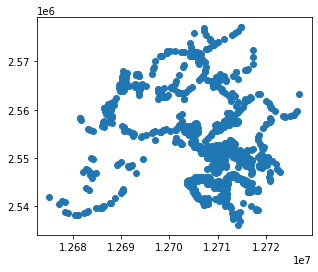

In [17]:
bus_stops.sample(1000).plot()

# Load pop data

In [18]:
pop = pd.read_csv('data/hk/pop/population_hkg_2018-10-01.csv')
pop

,latitude,longitude,population_2015,population_2020
0,22.160139,113.899028,9.337329,9.659727
1,22.163472,114.253194,17.163928,17.446940
2,22.163750,114.254306,17.163928,17.446940
3,22.164306,114.251250,17.163928,17.446940
4,22.164861,113.910139,9.337329,9.659727
...,...,...,...,...
109950,22.559306,114.170417,4.370319,4.752405
109951,22.559306,114.170694,4.370319,4.752405
109952,22.559306,114.177917,4.370319,4.752405
109953,22.559583,114.177639,4.370319,4.752405


In [19]:
pop['geometry'] = pop.apply(lambda r: sp.geometry.Point(r.longitude, r.latitude), axis=1)

In [20]:
pop = gpd.GeoDataFrame(pop)

In [21]:
pop = pop.set_crs(epsg=4326).to_crs(epsg=3857)

<AxesSubplot:>

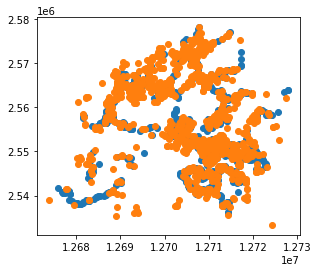

In [22]:
_, ax = plt.subplots()
bus_stops.sample(1000).plot(ax=ax)
pop.sample(1000).plot(ax=ax)

In [23]:
pop.sort_values('population_2020', ascending=False)

,latitude,longitude,population_2015,population_2020,geometry
67374,22.420139,114.224306,2123.358547,2211.049633,POINT (12715391.531 2562043.248)
68007,22.421250,114.224583,2123.358547,2211.049633,POINT (12715422.453 2562177.050)
67524,22.420417,114.225694,2123.358547,2211.049633,POINT (12715546.141 2562076.698)
68180,22.421528,114.224583,2123.358547,2211.049633,POINT (12715422.453 2562210.501)
67680,22.420694,114.225139,2123.358547,2211.049633,POINT (12715484.297 2562110.149)
...,...,...,...,...,...
107706,22.526528,114.259861,4.370319,4.752405,POINT (12719349.557 2574859.722)
107707,22.526528,114.260417,4.370319,4.752405,POINT (12719411.401 2574859.722)
107708,22.526528,114.260694,4.370319,4.752405,POINT (12719442.323 2574859.722)
107709,22.526806,114.121806,4.370319,4.752405,POINT (12703981.283 2574893.198)


## Inspecting correctedness

In [24]:
dists = bus_stops.distance(pop.geometry.iloc[67374])

In [25]:
dists.min()

245.35390236131144

In [26]:
dists[dists == dists.min()]

336760    245.353902
dtype: float64

In [27]:
bus_stops.loc[336760]

trip_id                                            1153-1-287-0530
stop_id                                                       6156
stop_name        [KMB+CTB] VISTA PARADISO/<BR>VISTA PARADISO, S...
stop_lat                                                  22.41887
stop_lon                                                 114.22603
zone_id                                                       6156
location_type                                                    0
stop_timezone                                       Asia/Hong_Kong
geometry               POINT (12715583.49493719 2561890.446433533)
Name: 336760, dtype: object

## testing analysis

In [28]:
# too expensive, need a smarter method
# matrix = pop.sample(100).geometry.apply(lambda g: bus_stops.sample(100).distance(g))
# matrix

In [29]:
bounds = pop.iloc[67374].geometry.buffer(500).bounds
bounds

(12714891.530669907, 2561543.24779966, 12715891.530669907, 2562543.24779966)

In [30]:
within = bus_stops.cx[bounds[0]:bounds[2], bounds[1]:bounds[3]]

In [31]:
within.stop_id.drop_duplicates().count()

10

<AxesSubplot:>

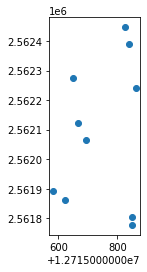

In [32]:
within.plot()

# number of stops within X distance for every population dot

In [33]:
# slightly speed it up
pop_tmp = pop[['population_2020', 'geometry']]

In [34]:
from npy_append_array import NpyAppendArray
import numpy as np

# Warning: takes an hour

In [35]:
if not os.path.exists('gen/hk_matrix.npy'):
    chunksize = 1000
    with NpyAppendArray('gen/hk_matrix.npy') as npya:
        for i in range(0, pop_tmp.shape[0], chunksize):
            df = pop_tmp[i:i+chunksize]
            sub_matrix = df.geometry.apply(lambda g: bus_stops.distance(g))
            npya.append(np.ascontiguousarray(sub_matrix.to_numpy()))

In [36]:
matrix = np.load('gen/hk_matrix.npy', mmap_mode='r')

In [37]:
matrix

memmap([[39535.956719  , 39292.08886239, 39030.26044147, ...,
         21357.45997408, 50252.35848858, 39328.24878266],
        [22897.65877411, 22946.12553228, 22927.55801592, ...,
         30070.11208626, 42326.68870151, 21233.28547077],
        [22902.65024759, 22952.62100741, 22935.54471544, ...,
         30157.795959  , 42326.23758395, 21236.74542386],
        ...,
        [25821.60338739, 25840.8769399 , 25930.15345222, ...,
         36147.33405948,  7158.6240466 , 27387.68491041],
        [25856.97399596, 25875.94178206, 25964.932472  , ...,
         36162.12594247,  7179.64569968, 27423.71916513],
        [25853.10684613, 25872.72673388, 25962.31978285, ...,
         36191.49246294,  7200.67841771, 27418.40579942]])

In [38]:
matrix.shape

(109955, 4282)

In [39]:
pop_idxs = pop_tmp.index
pop_idxs

RangeIndex(start=0, stop=109955, step=1)

In [40]:
count_for_every_pop = np.count_nonzero(matrix <= 500, axis=1)
count_for_every_pop

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
count_for_every_pop.shape

(109955,)

In [42]:
df = pd.DataFrame([count_for_every_pop, pop_idxs], index=['counts', 'pop_idx'])

In [43]:
df = df.T
df

,counts,pop_idx
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
109950,0,109950
109951,0,109951
109952,0,109952
109953,0,109953


In [44]:
pop_tmp_2 = pop.iloc[pop_tmp.index]
pop_tmp_2

,latitude,longitude,population_2015,population_2020,geometry
0,22.160139,113.899028,9.337329,9.659727,POINT (12679181.774 2530762.709)
1,22.163472,114.253194,17.163928,17.446940,POINT (12718607.427 2531163.374)
2,22.163750,114.254306,17.163928,17.446940,POINT (12718731.115 2531196.764)
3,22.164306,114.251250,17.163928,17.446940,POINT (12718390.973 2531263.542)
4,22.164861,113.910139,9.337329,9.659727,POINT (12680418.657 2531330.321)
...,...,...,...,...,...
109950,22.559306,114.170417,4.370319,4.752405,POINT (12709392.647 2578810.387)
109951,22.559306,114.170694,4.370319,4.752405,POINT (12709423.569 2578810.387)
109952,22.559306,114.177917,4.370319,4.752405,POINT (12710227.543 2578810.387)
109953,22.559583,114.177639,4.370319,4.752405,POINT (12710196.621 2578843.871)


In [45]:
df['pop'] = df['pop_idx'].apply(lambda idx: pop_tmp.iloc[idx].population_2020)

In [46]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

In [47]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

Text(0, 0.5, 'number of bus stops within 500 m')

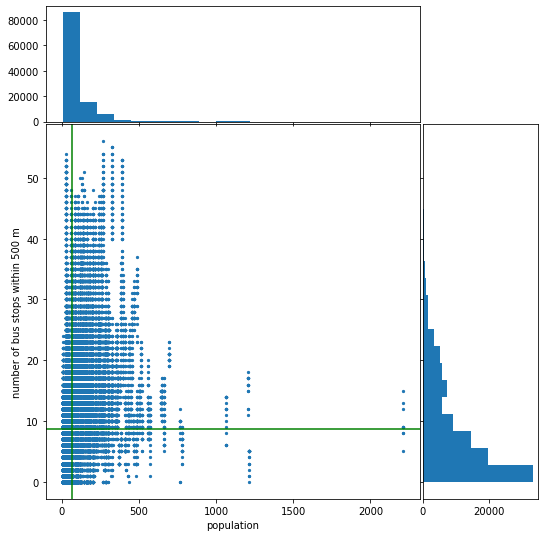

In [48]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df['pop'], df['counts'], s=5)
ax.axvline(x=df['pop'].mean(), c='green')
ax.axhline(y=df['counts'].mean(), c='green')

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df['pop'], bins=20)
ax_hy.hist(df['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 500 m')

In [49]:
df['counts'].describe()

count    109955.000000
mean          8.700650
std           9.027064
min           0.000000
25%           2.000000
50%           6.000000
75%          14.000000
max          56.000000
Name: counts, dtype: float64

In [50]:
df[['counts', 'pop']].to_csv('gen/hk_nstops_500m.csv')

In [51]:
df_outliers = df[
    (df['pop'] >= df['pop'].mean() + df['pop'].std() * 3)
    | (df['counts'] >= df['counts'].mean() + df['counts'].std() * 3)
]
df_outliers

,counts,pop_idx,pop
4488,14,4488,409.018686
4489,14,4489,409.018686
4533,14,4533,409.018686
4534,14,4534,409.018686
4579,12,4579,409.018686
...,...,...,...
99467,12,99467,641.409662
99468,13,99468,641.409662
99522,11,99522,641.409662
99523,12,99523,641.409662


In [52]:
df_gray = df[~df.index.isin(df_outliers.index)]

Text(0, 0.5, 'number of bus stops within 500 m')

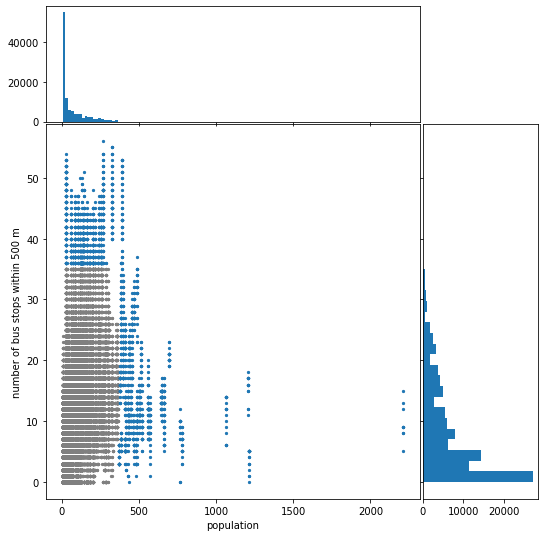

In [53]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df_gray['pop'], df_gray['counts'], s=5, c='gray')
ax.scatter(df_outliers['pop'], df_outliers['counts'], s=5)

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df_gray['pop'], bins=20)
ax_hy.hist(df_gray['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 500 m')

In [56]:
df['geometry'] = df['pop_idx'].apply(lambda idx: pop_tmp.iloc[idx].geometry)

In [57]:
gdf = gpd.GeoDataFrame(df)

In [58]:
gdf[['pop', 'counts', 'geometry']].to_file('gen/hk_nstops_500m.shp')

<AxesSubplot:>

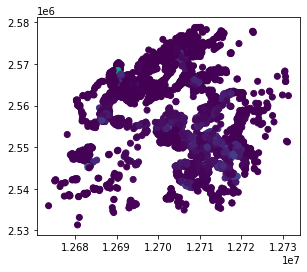

In [59]:
gdf.sample(5000).plot('pop')

<AxesSubplot:>

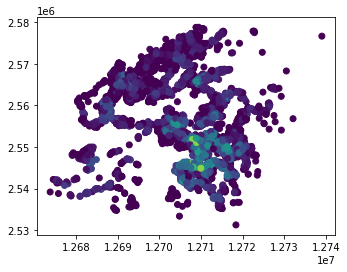

In [60]:
gdf.sample(5000).plot('counts')

In [61]:
gdf_outliers = gdf[
    (gdf['pop'] >= gdf['pop'].mean() + gdf['pop'].std() * 3)
    | (gdf['counts'] >= gdf['counts'].mean() + gdf['counts'].std() * 3)
]


<AxesSubplot:>

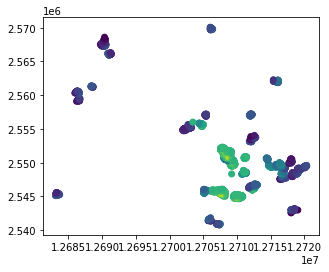

In [62]:
gdf_outliers.plot('counts')

In [63]:
# def f(row):
#     xmin, ymin, xmax, ymax = row.geometry.buffer(500).bounds
#     within = bus_stops.cx[xmin:xmax, ymin:ymax]
#     return within.stop_id.drop_duplicates().count()

# pop_tmp['counts'] = pop_tmp.apply(f, axis=1)

In [64]:
#pop_tmp.head()

In [65]:
#sns.scatterplot(data=pop_tmp, x='population_2020', y='counts')

In [66]:
#pop_tmp.to_csv('gen/hk_stops_within_pop.csv')

# % of people living within X distance of bus stop

In [67]:
no_stops = gdf[gdf.counts == 0]
no_stops

,counts,pop_idx,pop,geometry
0,0,0,9.659727,POINT (12679181.774 2530762.709)
1,0,1,17.446940,POINT (12718607.427 2531163.374)
2,0,2,17.446940,POINT (12718731.115 2531196.764)
3,0,3,17.446940,POINT (12718390.973 2531263.542)
4,0,4,9.659727,POINT (12680418.657 2531330.321)
...,...,...,...,...
109950,0,109950,4.752405,POINT (12709392.647 2578810.387)
109951,0,109951,4.752405,POINT (12709423.569 2578810.387)
109952,0,109952,4.752405,POINT (12710227.543 2578810.387)
109953,0,109953,4.752405,POINT (12710196.621 2578843.871)


<AxesSubplot:>

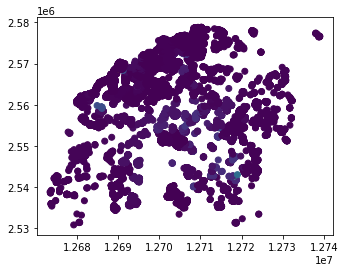

In [68]:
no_stops.plot('pop')

In [69]:
no_stops['pop'].sum()

413438.55197697796

In [70]:
pop.population_2020.sum()

7557179.66036896

In [71]:
# % of pop not within 500m of bus stop
no_stops['pop'].sum() / pop.population_2020.sum()

0.05470804857864036

In [72]:
# % of pop within 500m of bus stop
1 - no_stops['pop'].sum() / pop.population_2020.sum()

0.9452919514213597

# More continuous plots of share within

In [73]:
def pct_pop_within_stop(distance):
    if not os.path.exists(f'gen/hk_count_{distance}m.h5'):
        count_for_every_pop = pd.HDFStore(f'gen/hk_count_{distance}m.h5')
        for x in store.select('df', chunksize=10):
            count_for_every_pop.put('data', x[x <= distance].count(axis=1), format='table', append=True)
        count_for_every_pop.close()

    df = pd.read_hdf(f'gen/hk_count_{distance}m.h5', key='data')
    df = df.reset_index()
    df.columns = ['idx', 'counts']
    df['pop'] = df['idx'].apply(lambda idx: pop_tmp.iloc[idx].population_2020)
    #df['geometry'] = df['idx'].apply(lambda idx: pop_tmp.loc[idx].geometry)
    no_stops = df[df.counts == 0]

    return 1 - no_stops['pop'].sum() / pop.population_2020.sum()

In [74]:
domain = list(range(100, 1100, 100))
domain

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Warning: slow

In [75]:
pcts = [pct_pop_within_stop(x) for x in domain]
pcts

[0.4391480179097227,
 0.7835597974640731,
 0.887248533371269,
 0.9254743547581761,
 0.9452919514213597,
 0.9558688691634051,
 0.9643932317771083,
 0.9701678389904258,
 0.97469771775156,
 0.9782272559946402]

<AxesSubplot:>

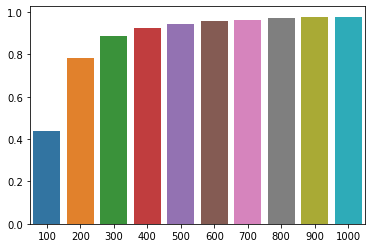

In [76]:
sns.barplot(y=pcts, x=domain)

In [77]:
pd.DataFrame(pcts, columns=['percentage'], index=domain).to_csv('gen/hk_percentage_within.csv')

# Distributions of number of dots within stop

In [78]:
def distributions_nstops(distance):
    if not os.path.exists(f'gen/hk_count_{distance}m.h5'):
        count_for_every_pop = pd.HDFStore(f'gen/hk_count_{distance}m.h5')
        for x in store.select('df', chunksize=10):
            count_for_every_pop.put('data', x[x <= distance].count(axis=1), format='table', append=True)
        count_for_every_pop.close()
    df = pd.read_hdf(f'gen/hk_count_{distance}m.h5', key='data')
    return df.values

In [79]:
distrs = [distributions_nstops(distance) for distance in domain]
distrs

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

In [80]:
dists_df = pd.DataFrame(distrs).T

In [81]:
dists_df.columns = domain

In [82]:
dists_df

,100,200,300,400,500,600,700,800,900,1000
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
109950,0,0,0,0,0,0,0,0,0,0
109951,0,0,0,0,0,0,0,0,0,0
109952,0,0,0,0,0,0,0,0,0,0
109953,0,0,0,0,0,0,0,0,0,0


In [83]:
dists_df = dists_df.reset_index().melt('index', dists_df.columns, var_name='distance', value_name='count')
dists_df

,index,distance,count
0,0,100,0
1,1,100,0
2,2,100,0
3,3,100,0
4,4,100,0
...,...,...,...
1099545,109950,1000,0
1099546,109951,1000,0
1099547,109952,1000,0
1099548,109953,1000,0


<AxesSubplot:xlabel='distance', ylabel='count'>

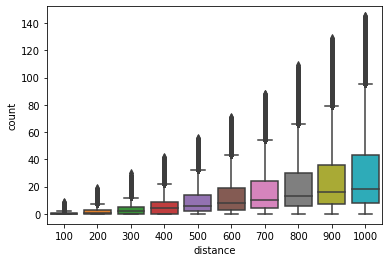

In [84]:
sns.boxplot(data=dists_df, x='distance', y='count')

In [85]:
dists_df[['distance', 'count']].to_csv('gen/hk_dists_nstops.csv')

In [86]:
dists_df[dists_df['count'] == dists_df['count'].max()]

,index,distance,count
1025812,36217,1000,145
1026004,36409,1000,145


In [87]:
pop_tmp.iloc[36217]

population_2020                                     202.981126
geometry           POINT (12708372.21833377 2551676.790489478)
Name: 36217, dtype: object

# 1km

In [88]:
if not os.path.exists('gen/hk_count_1000m.h5'):
    count_for_every_pop = pd.HDFStore('gen/hk_count_1000m.h5')
    for x in store.select('df', chunksize=10):
        count_for_every_pop.put('data', x[x <= 1000].count(axis=1), format='table', append=True)
    count_for_every_pop.close()

In [89]:
df = pd.read_hdf('gen/hk_count_1000m.h5', key='data')

In [90]:
df = df.reset_index()

In [91]:
df.columns = ['idx', 'counts']

In [92]:
df['pop'] = df['idx'].apply(lambda idx: pop_tmp.iloc[idx].population_2020)

In [93]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

In [94]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

Text(0, 0.5, 'number of bus stops within 1000 m')

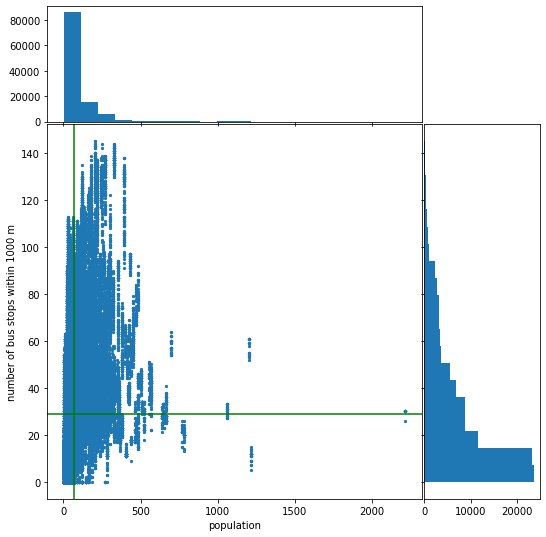

In [95]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df['pop'], df['counts'], s=5)
ax.axvline(x=df['pop'].mean(), c='green')
ax.axhline(y=df['counts'].mean(), c='green')

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df['pop'], bins=20)
ax_hy.hist(df['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 1000 m')

In [96]:
df['counts'].describe()

count    109955.000000
mean         28.690437
std          27.475528
min           0.000000
25%           8.000000
50%          18.000000
75%          43.000000
max         145.000000
Name: counts, dtype: float64

In [97]:
df[['counts', 'pop']].to_csv('gen/hk_nstops_1000m.csv')

In [98]:
df_outliers = df[
    (df['pop'] >= df['pop'].mean() + df['pop'].std() * 3)
    | (df['counts'] >= df['counts'].mean() + df['counts'].std() * 3)
]
df_outliers

,idx,counts,pop
4488,4488,53,409.018686
4489,4489,53,409.018686
4533,4533,53,409.018686
4534,4534,53,409.018686
4579,4579,51,409.018686
...,...,...,...
99467,99467,31,641.409662
99468,99468,32,641.409662
99522,99522,32,641.409662
99523,99523,32,641.409662


In [99]:
df_gray = df[~df.index.isin(df_outliers.index)]

Text(0, 0.5, 'number of bus stops within 1000 m')

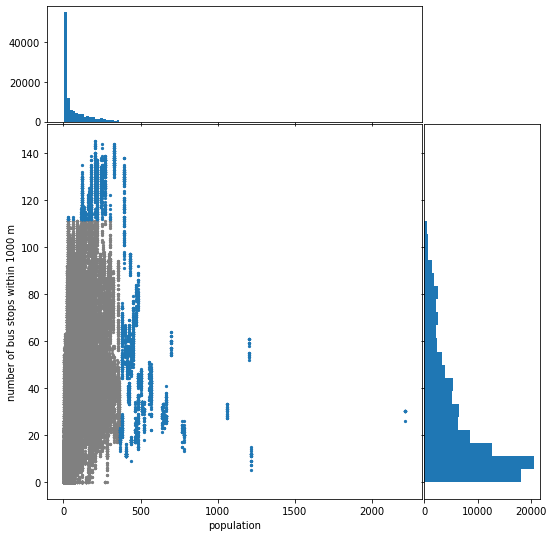

In [100]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df_gray['pop'], df_gray['counts'], s=5, c='gray')
ax.scatter(df_outliers['pop'], df_outliers['counts'], s=5)

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df_gray['pop'], bins=20)
ax_hy.hist(df_gray['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 1000 m')

In [101]:
df['geometry'] = df['idx'].apply(lambda idx: pop_tmp.loc[idx].geometry)

In [102]:
gdf = gpd.GeoDataFrame(df)

<AxesSubplot:>

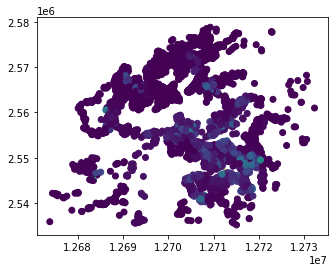

In [103]:
gdf.sample(5000).plot('pop')

<AxesSubplot:>

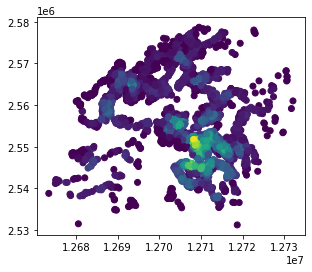

In [104]:
gdf.sample(5000).plot('counts')

In [105]:
gdf_outliers = gdf[
    (gdf['pop'] >= gdf['pop'].mean() + gdf['pop'].std() * 3)
    | (gdf['counts'] >= gdf['counts'].mean() + gdf['counts'].std() * 3)
]


<AxesSubplot:>

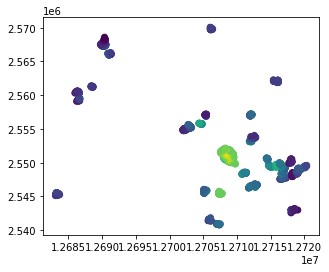

In [106]:
gdf_outliers.plot('counts')

# % of people living within X distance of bus stop

In [107]:
no_stops = gdf[gdf.counts == 0]
no_stops

,idx,counts,pop,geometry
0,0,0,9.659727,POINT (12679181.774 2530762.709)
1,1,0,17.446940,POINT (12718607.427 2531163.374)
2,2,0,17.446940,POINT (12718731.115 2531196.764)
3,3,0,17.446940,POINT (12718390.973 2531263.542)
4,4,0,9.659727,POINT (12680418.657 2531330.321)
...,...,...,...,...
109950,109950,0,4.752405,POINT (12709392.647 2578810.387)
109951,109951,0,4.752405,POINT (12709423.569 2578810.387)
109952,109952,0,4.752405,POINT (12710227.543 2578810.387)
109953,109953,0,4.752405,POINT (12710196.621 2578843.871)


<AxesSubplot:>

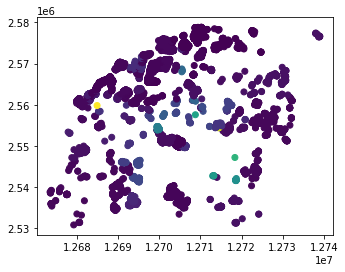

In [108]:
no_stops.plot('pop')

In [109]:
no_stops['pop'].sum()

164540.53814772505

In [110]:
gdf['pop'].sum()  # same as total population

7557179.66036896

In [111]:
pop.population_2020.sum()

7557179.66036896

In [112]:
# % of pop not within 1000 m of bus stop
no_stops['pop'].sum() / pop.population_2020.sum()

0.02177274400535977

In [113]:
# % of pop within 1000 m of bus stop
1 - no_stops['pop'].sum() / pop.population_2020.sum()

0.9782272559946402

# 100 m

In [114]:
if not os.path.exists('gen/hk_count_100m.h5'):
    count_for_every_pop = pd.HDFStore('gen/hk_count_100m.h5')
    for x in store.select('df', chunksize=10):
        count_for_every_pop.put('data', x[x <= 100].count(axis=1), format='table', append=True)
    count_for_every_pop.close()

In [115]:
df = pd.read_hdf('gen/hk_count_100m.h5', key='data')

In [116]:
df = df.reset_index()

In [117]:
df.columns = ['idx', 'counts']

In [118]:
df['pop'] = df['idx'].apply(lambda idx: pop_tmp.iloc[idx].population_2020)

In [119]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

In [120]:
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

Text(0, 0.5, 'number of bus stops within 100 m')

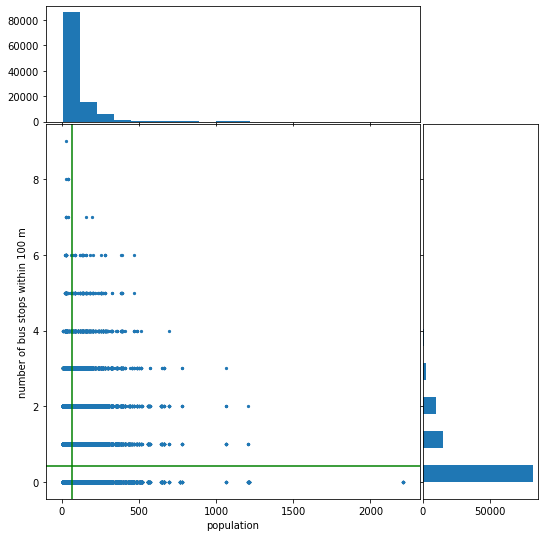

In [121]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df['pop'], df['counts'], s=5)
ax.axvline(x=df['pop'].mean(), c='green')
ax.axhline(y=df['counts'].mean(), c='green')

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df['pop'], bins=20)
ax_hy.hist(df['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 100 m')

In [122]:
df['counts'].describe()

count    109955.000000
mean          0.424101
std           0.829923
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: counts, dtype: float64

In [123]:
df[['counts', 'pop']].to_csv('gen/hk_nstops_100m.csv')

In [124]:
df_outliers = df[
    (df['pop'] >= df['pop'].mean() + df['pop'].std() * 3)
    | (df['counts'] >= df['counts'].mean() + df['counts'].std() * 3)
]
df_outliers

,idx,counts,pop
1314,1314,3,17.446940
1320,1320,4,17.446940
1321,1321,4,17.446940
1322,1322,3,17.446940
1355,1355,3,17.446940
...,...,...,...
105680,105680,3,9.065602
105800,105800,3,9.065602
105801,105801,3,9.065602
105802,105802,3,9.065602


In [125]:
df_gray = df[~df.index.isin(df_outliers.index)]

Text(0, 0.5, 'number of bus stops within 100 m')

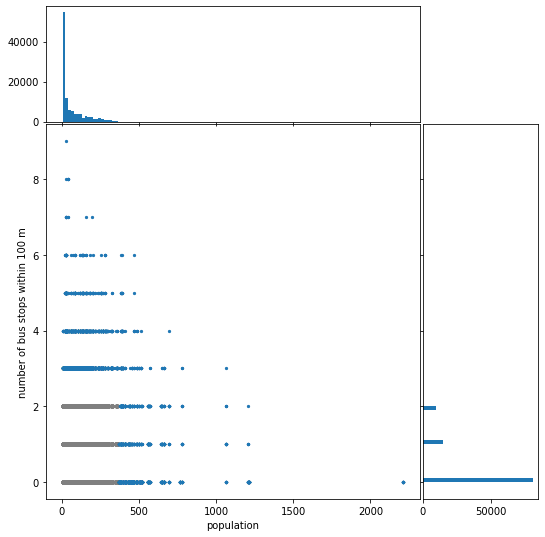

In [126]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes(rect_scatter)
ax.scatter(df_gray['pop'], df_gray['counts'], s=5, c='gray')
ax.scatter(df_outliers['pop'], df_outliers['counts'], s=5)

ax_hx = fig.add_axes(rect_histx, sharex=ax)
ax_hy = fig.add_axes(rect_histy, sharey=ax)
ax_hx.tick_params(axis="x", labelbottom=False)
ax_hy.tick_params(axis="y", labelleft=False)

ax_hx.hist(df_gray['pop'], bins=20)
ax_hy.hist(df_gray['counts'], orientation='horizontal', bins=20)

ax.set_xlabel('population')
ax.set_ylabel('number of bus stops within 100 m')

In [127]:
df['geometry'] = df['idx'].apply(lambda idx: pop_tmp.loc[idx].geometry)

In [128]:
gdf = gpd.GeoDataFrame(df)

<AxesSubplot:>

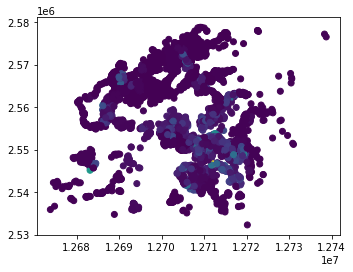

In [129]:
gdf.sample(5000).plot('pop')

<AxesSubplot:>

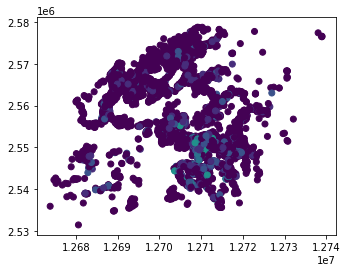

In [130]:
gdf.sample(5000).plot('counts')

In [131]:
gdf_outliers = gdf[
    (gdf['pop'] >= gdf['pop'].mean() + gdf['pop'].std() * 3)
    | (gdf['counts'] >= gdf['counts'].mean() + gdf['counts'].std() * 3)
]


<AxesSubplot:>

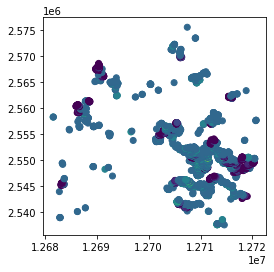

In [132]:
gdf_outliers.plot('counts')

# % of people living within X distance of bus stop

In [133]:
no_stops = gdf[gdf.counts == 0]
no_stops

,idx,counts,pop,geometry
0,0,0,9.659727,POINT (12679181.774 2530762.709)
1,1,0,17.446940,POINT (12718607.427 2531163.374)
2,2,0,17.446940,POINT (12718731.115 2531196.764)
3,3,0,17.446940,POINT (12718390.973 2531263.542)
4,4,0,9.659727,POINT (12680418.657 2531330.321)
...,...,...,...,...
109950,109950,0,4.752405,POINT (12709392.647 2578810.387)
109951,109951,0,4.752405,POINT (12709423.569 2578810.387)
109952,109952,0,4.752405,POINT (12710227.543 2578810.387)
109953,109953,0,4.752405,POINT (12710196.621 2578843.871)


<AxesSubplot:>

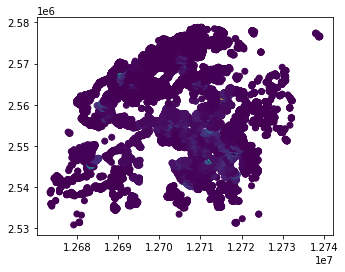

In [134]:
no_stops.plot('pop')

In [135]:
no_stops['pop'].sum()

4238459.19153026

In [136]:
gdf['pop'].sum()  # same as total population

7557179.66036896

In [137]:
pop.population_2020.sum()

7557179.66036896

In [138]:
# % of pop not within 1000 m of bus stop
no_stops['pop'].sum() / pop.population_2020.sum()

0.5608519820902773

In [139]:
# % of pop within 1000 m of bus stop
1 - no_stops['pop'].sum() / pop.population_2020.sum()

0.4391480179097227